In [1]:
import torch 

In [2]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# creating some data to train Linear Regression 
x = torch.tensor(np.arange(10), dtype = torch.float32)
y = x*5 + 10 + torch.randint(low = -5, high = 5, size = (10,), dtype = torch.float32)
print(x)
print(y)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor([ 5., 18., 22., 27., 34., 35., 35., 44., 47., 50.])


<AxesSubplot:>

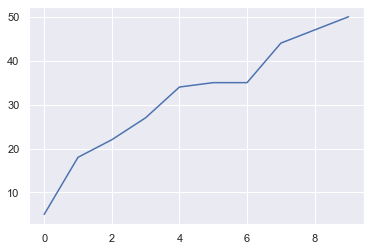

In [25]:
sns.set()
sns.lineplot(x = x, y = y)

In [26]:
# initializing weights
# we have only one feature, so we need to find two coefficients: slope and intercept 
# let's initialize them as zeros 

w = torch.zeros(2, dtype = torch.float16, )
print(w)

tensor([0., 0.], dtype=torch.float16)


In [27]:
# functions
def predict(w, x):
    y_pred = w[0]*x + w[1]
    return y_pred 

def mseerror(y, y_pred):
    loss_val = ((y_pred - y)**2).mean()
    return loss_val 

# derivative from mse with respect to slope: 2x*(y - y_pred)
def beta1gradient(x, y, y_pred):
    direction = np.dot(2*x, y_pred - y).mean()
    return direction 
# derivative from mse with respect to intercept: 2x*(y - y_pred)
def beta0gradient(x, y, y_pred):
    direction = np.dot(2, y_pred - y).mean()
    return direction

In [28]:
# let's check our predictions before training 
y_pred = predict(w, x)
error = mseerror(y, y_pred)
print(error)

tensor(1181.3000)


<AxesSubplot:>

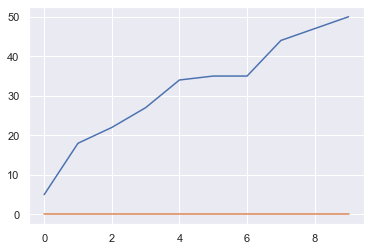

In [29]:
sns.set()
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)

In [30]:
#training 
#first let's train our model with a stopping criteria as numbers of steps 
learning_rait = 0.0006 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float16)
for step in range(number_of_steps):
    y_pred = predict(w, x)
    beta1 = beta1gradient(x, y, y_pred)
    beta0 = beta0gradient(x, y, y_pred)
    w -= learning_rait*torch.tensor([beta1,beta0]) 
    error = mseerror(y, y_pred)
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1181.300048828125, weights = tensor([2.1582, 0.0380], dtype=torch.float16)
step №1: loss = 536.2879028320312, weights = tensor([3.5762, 0.0644], dtype=torch.float16)
step №2: loss = 257.7894592285156, weights = tensor([4.5078, 0.0831], dtype=torch.float16)
step №3: loss = 137.53172302246094, weights = tensor([5.1211, 0.0967], dtype=torch.float16)
step №4: loss = 85.52013397216797, weights = tensor([5.5234, 0.1069], dtype=torch.float16)
step №5: loss = 63.1077995300293, weights = tensor([5.7852, 0.1150], dtype=torch.float16)
step №6: loss = 53.5067138671875, weights = tensor([5.9570, 0.1216], dtype=torch.float16)
step №7: loss = 49.333187103271484, weights = tensor([6.0703, 0.1273], dtype=torch.float16)
step №8: loss = 47.503379821777344, weights = tensor([6.1445, 0.1324], dtype=torch.float16)
step №9: loss = 46.69642639160156, weights = tensor([6.1953, 0.1372], dtype=torch.float16)
step №10: loss = 46.31995391845703, weights = tensor([6.2266, 0.1416], dtype=torch.float1

step №335: loss = 38.386627197265625, weights = tensor([6.0938, 1.3857], dtype=torch.float16)
step №336: loss = 38.364017486572266, weights = tensor([6.0938, 1.3896], dtype=torch.float16)
step №337: loss = 38.3414306640625, weights = tensor([6.0938, 1.3936], dtype=torch.float16)
step №338: loss = 38.31887435913086, weights = tensor([6.0938, 1.3975], dtype=torch.float16)
step №339: loss = 38.296363830566406, weights = tensor([6.0938, 1.4014], dtype=torch.float16)
step №340: loss = 38.27387237548828, weights = tensor([6.0898, 1.4053], dtype=torch.float16)
step №341: loss = 38.25031661987305, weights = tensor([6.0898, 1.4092], dtype=torch.float16)
step №342: loss = 38.227752685546875, weights = tensor([6.0898, 1.4131], dtype=torch.float16)
step №343: loss = 38.2052116394043, weights = tensor([6.0898, 1.4170], dtype=torch.float16)
step №344: loss = 38.18271255493164, weights = tensor([6.0898, 1.4209], dtype=torch.float16)
step №345: loss = 38.16023635864258, weights = tensor([6.0898, 1.424

step №636: loss = 32.74787521362305, weights = tensor([5.9336, 2.4062], dtype=torch.float16)
step №637: loss = 32.72760772705078, weights = tensor([5.9336, 2.4102], dtype=torch.float16)
step №638: loss = 32.707366943359375, weights = tensor([5.9336, 2.4141], dtype=torch.float16)
step №639: loss = 32.687156677246094, weights = tensor([5.9297, 2.4180], dtype=torch.float16)
step №640: loss = 32.66594314575195, weights = tensor([5.9297, 2.4219], dtype=torch.float16)
step №641: loss = 32.645660400390625, weights = tensor([5.9297, 2.4258], dtype=torch.float16)
step №642: loss = 32.625404357910156, weights = tensor([5.9297, 2.4297], dtype=torch.float16)
step №643: loss = 32.60518264770508, weights = tensor([5.9297, 2.4336], dtype=torch.float16)
step №644: loss = 32.584983825683594, weights = tensor([5.9297, 2.4375], dtype=torch.float16)
step №645: loss = 32.56482696533203, weights = tensor([5.9258, 2.4414], dtype=torch.float16)
step №646: loss = 32.543701171875, weights = tensor([5.9258, 2.44

Text(0.5, 1.0, 'Manually calculated derivative. Slope = 5.77734375, intercept = 3.3828125, loss = 27.9068660736084')

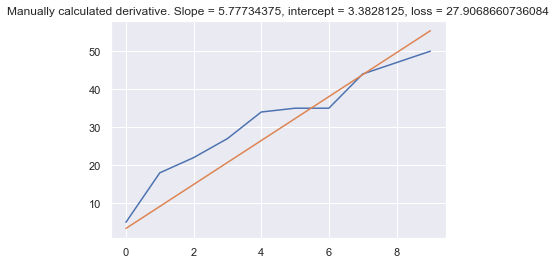

In [31]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)
plt.title(f'Manually calculated derivative. Slope = {w[0]}, intercept = {w[1]}, loss = {error}')

In [32]:
#training 
#now stopping criteria is difference between errors  
learning_rait = 0.0006 
w = torch.zeros(2, dtype = torch.float16)
y_pred = predict(w, x)
previous_error = mseerror(y, y_pred)
beta1 = beta1gradient(x, y, y_pred)
beta0 = beta0gradient(x, y, y_pred)
w -= learning_rait*torch.tensor([beta1,beta0]) 
error = mseerror(y, y_pred)
y_pred = predict(w, x)
beta1 = beta1gradient(x, y, y_pred)
beta0 = beta0gradient(x, y, y_pred)
w -= learning_rait*torch.tensor([beta1,beta0]) 
previous_error = error
error = mseerror(y, y_pred)
while previous_error - error > 0.0000000005:
    y_pred = predict(w, x)
    beta1 = beta1gradient(x, y, y_pred)
    beta0 = beta0gradient(x, y, y_pred)
    w -= learning_rait*torch.tensor([beta1,beta0]) 
    previous_error = error 
    error = mseerror(y, y_pred)
    print(f'did one more step, loss reduced by {previous_error - error}')

did one more step, loss reduced by 278.4984436035156
did one more step, loss reduced by 120.25773620605469
did one more step, loss reduced by 52.01158905029297
did one more step, loss reduced by 22.412334442138672
did one more step, loss reduced by 9.601085662841797
did one more step, loss reduced by 4.173526763916016
did one more step, loss reduced by 1.8298072814941406
did one more step, loss reduced by 0.8069534301757812
did one more step, loss reduced by 0.37647247314453125
did one more step, loss reduced by 0.16679763793945312
did one more step, loss reduced by 0.085235595703125
did one more step, loss reduced by 0.05072021484375
did one more step, loss reduced by 0.037418365478515625
did one more step, loss reduced by 0.033336639404296875
did one more step, loss reduced by 0.028400421142578125
did one more step, loss reduced by 0.026409149169921875
did one more step, loss reduced by 0.025524139404296875
did one more step, loss reduced by 0.025485992431640625
did one more step, lo

did one more step, loss reduced by 0.016277313232421875
did one more step, loss reduced by 0.01625823974609375
did one more step, loss reduced by 0.01624298095703125
did one more step, loss reduced by 0.017242431640625
did one more step, loss reduced by 0.016315460205078125
did one more step, loss reduced by 0.016292572021484375
did one more step, loss reduced by 0.01627349853515625
did one more step, loss reduced by 0.016254425048828125
did one more step, loss reduced by 0.01624298095703125
did one more step, loss reduced by 0.0162200927734375
did one more step, loss reduced by 0.01621246337890625
did one more step, loss reduced by 0.0171661376953125
did one more step, loss reduced by 0.016277313232421875
did one more step, loss reduced by 0.01625823974609375
did one more step, loss reduced by 0.016239166259765625
did one more step, loss reduced by 0.016223907470703125
did one more step, loss reduced by 0.016208648681640625
did one more step, loss reduced by 0.016185760498046875
did o

did one more step, loss reduced by 0.00919342041015625
did one more step, loss reduced by 0.009185791015625
did one more step, loss reduced by 0.00917816162109375
did one more step, loss reduced by 0.010135650634765625
did one more step, loss reduced by 0.0092315673828125
did one more step, loss reduced by 0.009222030639648438
did one more step, loss reduced by 0.00921630859375
did one more step, loss reduced by 0.009206771850585938
did one more step, loss reduced by 0.0092010498046875
did one more step, loss reduced by 0.00919342041015625
did one more step, loss reduced by 0.009185791015625
did one more step, loss reduced by 0.009176254272460938
did one more step, loss reduced by 0.0091705322265625
did one more step, loss reduced by 0.009160995483398438
did one more step, loss reduced by 0.0091552734375
did one more step, loss reduced by 0.010066986083984375
did one more step, loss reduced by 0.00920867919921875
did one more step, loss reduced by 0.0092010498046875
did one more step, 

did one more step, loss reduced by 0.015584945678710938
did one more step, loss reduced by 0.015554428100585938
did one more step, loss reduced by 0.01552581787109375
did one more step, loss reduced by 0.015493392944335938
did one more step, loss reduced by 0.015462875366210938
did one more step, loss reduced by 0.016422271728515625
did one more step, loss reduced by 0.01554107666015625
did one more step, loss reduced by 0.015508651733398438
did one more step, loss reduced by 0.015478134155273438
did one more step, loss reduced by 0.015447616577148438
did one more step, loss reduced by 0.015417098999023438
did one more step, loss reduced by 0.01538848876953125
did one more step, loss reduced by 0.016437530517578125
did one more step, loss reduced by 0.015462875366210938
did one more step, loss reduced by 0.015432357788085938
did one more step, loss reduced by 0.01540374755859375
did one more step, loss reduced by 0.015371322631835938
did one more step, loss reduced by 0.015340805053710

Text(0.5, 1.0, 'Manually calculated derivative. Slope = 5.41015625, intercept = 5.7265625, loss = 18.56068229675293')

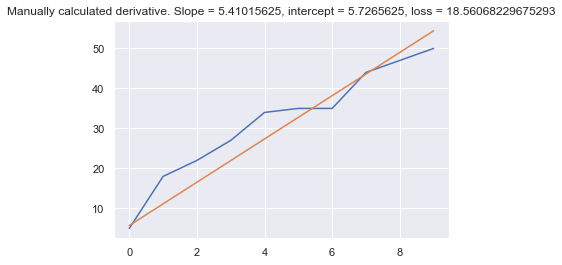

In [33]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)
plt.title(f'Manually calculated derivative. Slope = {w[0]}, intercept = {w[1]}, loss = {error}')

In [34]:
#now let's use PyTorch gradient calculation. We don't need our gradient function. 
learning_rait = 0.0006 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float16, requires_grad = True) #it should be mentioned that in the future 
                                                            #you will need a derivative with respect to these values
for step in range(number_of_steps):
    y_pred = predict(w, x)
    error = mseerror(y, y_pred)
    error.backward()
    with torch.no_grad():
        w -= learning_rait*w.grad
    w.grad.zero_()
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1181.300048828125, weights = tensor([0.2157, 0.0380], dtype=torch.float16, requires_grad=True)
step №1: loss = 1102.725341796875, weights = tensor([0.4238, 0.0748], dtype=torch.float16, requires_grad=True)
step №2: loss = 1029.557861328125, weights = tensor([0.6245, 0.1105], dtype=torch.float16, requires_grad=True)
step №3: loss = 961.4700927734375, weights = tensor([0.8184, 0.1450], dtype=torch.float16, requires_grad=True)
step №4: loss = 897.9996948242188, weights = tensor([1.0059, 0.1785], dtype=torch.float16, requires_grad=True)
step №5: loss = 838.7605590820312, weights = tensor([1.1865, 0.2108], dtype=torch.float16, requires_grad=True)
step №6: loss = 783.6795654296875, weights = tensor([1.3604, 0.2422], dtype=torch.float16, requires_grad=True)
step №7: loss = 732.5275268554688, weights = tensor([1.5283, 0.2727], dtype=torch.float16, requires_grad=True)
step №8: loss = 684.8211669921875, weights = tensor([1.6904, 0.3022], dtype=torch.float16, requires_grad=True)
s

step №329: loss = 34.462379455566406, weights = tensor([6.0312, 2.1016], dtype=torch.float16, requires_grad=True)
step №330: loss = 34.4307746887207, weights = tensor([6.0312, 2.1055], dtype=torch.float16, requires_grad=True)
step №331: loss = 34.411582946777344, weights = tensor([6.0312, 2.1094], dtype=torch.float16, requires_grad=True)
step №332: loss = 34.392433166503906, weights = tensor([6.0312, 2.1133], dtype=torch.float16, requires_grad=True)
step №333: loss = 34.3733024597168, weights = tensor([6.0312, 2.1172], dtype=torch.float16, requires_grad=True)
step №334: loss = 34.354209899902344, weights = tensor([6.0312, 2.1211], dtype=torch.float16, requires_grad=True)
step №335: loss = 34.33514404296875, weights = tensor([6.0273, 2.1230], dtype=torch.float16, requires_grad=True)
step №336: loss = 34.31321334838867, weights = tensor([6.0273, 2.1270], dtype=torch.float16, requires_grad=True)
step №337: loss = 34.29405975341797, weights = tensor([6.0273, 2.1309], dtype=torch.float16, r

step №657: loss = 31.006494522094727, weights = tensor([5.9297, 2.7617], dtype=torch.float16, requires_grad=True)
step №658: loss = 30.9976806640625, weights = tensor([5.9297, 2.7637], dtype=torch.float16, requires_grad=True)
step №659: loss = 30.988880157470703, weights = tensor([5.9258, 2.7656], dtype=torch.float16, requires_grad=True)
step №660: loss = 30.967693328857422, weights = tensor([5.9258, 2.7676], dtype=torch.float16, requires_grad=True)
step №661: loss = 30.958837509155273, weights = tensor([5.9258, 2.7695], dtype=torch.float16, requires_grad=True)
step №662: loss = 30.949987411499023, weights = tensor([5.9258, 2.7715], dtype=torch.float16, requires_grad=True)
step №663: loss = 30.941146850585938, weights = tensor([5.9258, 2.7734], dtype=torch.float16, requires_grad=True)
step №664: loss = 30.93231201171875, weights = tensor([5.9258, 2.7754], dtype=torch.float16, requires_grad=True)
step №665: loss = 30.923486709594727, weights = tensor([5.9258, 2.7773], dtype=torch.float1

Text(0.5, 1.0, 'Derivative is calculated by Pytorch. Slope = 5.82421875, intercept = 3.4296875, loss = 27.780248641967773')

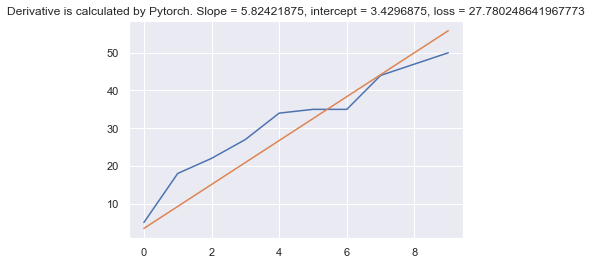

In [35]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred.detach().numpy())
plt.title(f'Derivative is calculated by Pytorch. Slope = {w[0]}, intercept = {w[1]}, loss = {error}')

In [36]:
#let's also use mse error and optimizer which are provided by Pytorch library  
import torch.nn as nn 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float32, requires_grad = True)
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = 0.0006)
for step in range(number_of_steps):
    y_pred = predict(w, x)
    error = loss(y, y_pred)
    error.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1181.300048828125, weights = tensor([0.2158, 0.0380], requires_grad=True)
step №1: loss = 1102.7030029296875, weights = tensor([0.4239, 0.0749], requires_grad=True)
step №2: loss = 1029.519287109375, weights = tensor([0.6248, 0.1105], requires_grad=True)
step №3: loss = 961.3761596679688, weights = tensor([0.8186, 0.1451], requires_grad=True)
step №4: loss = 897.9259033203125, weights = tensor([1.0056, 0.1785], requires_grad=True)
step №5: loss = 838.8455810546875, weights = tensor([1.1860, 0.2109], requires_grad=True)
step №6: loss = 783.8341064453125, weights = tensor([1.3600, 0.2423], requires_grad=True)
step №7: loss = 732.6109619140625, weights = tensor([1.5280, 0.2727], requires_grad=True)
step №8: loss = 684.9152221679688, weights = tensor([1.6900, 0.3022], requires_grad=True)
step №9: loss = 640.504150390625, weights = tensor([1.8463, 0.3307], requires_grad=True)
step №10: loss = 599.1510620117188, weights = tensor([1.9972, 0.3584], requires_grad=True)
step №11:

step №313: loss = 34.709144592285156, weights = tensor([6.0016, 2.0391], requires_grad=True)
step №314: loss = 34.69180679321289, weights = tensor([6.0011, 2.0423], requires_grad=True)
step №315: loss = 34.67448425292969, weights = tensor([6.0006, 2.0454], requires_grad=True)
step №316: loss = 34.657161712646484, weights = tensor([6.0001, 2.0486], requires_grad=True)
step №317: loss = 34.639862060546875, weights = tensor([5.9996, 2.0518], requires_grad=True)
step №318: loss = 34.62257385253906, weights = tensor([5.9991, 2.0550], requires_grad=True)
step №319: loss = 34.60530090332031, weights = tensor([5.9985, 2.0582], requires_grad=True)
step №320: loss = 34.58802795410156, weights = tensor([5.9980, 2.0613], requires_grad=True)
step №321: loss = 34.57078552246094, weights = tensor([5.9975, 2.0645], requires_grad=True)
step №322: loss = 34.55352783203125, weights = tensor([5.9970, 2.0677], requires_grad=True)
step №323: loss = 34.53630447387695, weights = tensor([5.9965, 2.0709], requi

step №629: loss = 29.776092529296875, weights = tensor([5.8495, 2.9934], requires_grad=True)
step №630: loss = 29.762094497680664, weights = tensor([5.8490, 2.9963], requires_grad=True)
step №631: loss = 29.74810791015625, weights = tensor([5.8486, 2.9991], requires_grad=True)
step №632: loss = 29.7341365814209, weights = tensor([5.8481, 3.0020], requires_grad=True)
step №633: loss = 29.720165252685547, weights = tensor([5.8476, 3.0049], requires_grad=True)
step №634: loss = 29.70621109008789, weights = tensor([5.8472, 3.0077], requires_grad=True)
step №635: loss = 29.6922607421875, weights = tensor([5.8467, 3.0106], requires_grad=True)
step №636: loss = 29.678325653076172, weights = tensor([5.8463, 3.0134], requires_grad=True)
step №637: loss = 29.66440773010254, weights = tensor([5.8458, 3.0163], requires_grad=True)
step №638: loss = 29.65048599243164, weights = tensor([5.8454, 3.0191], requires_grad=True)
step №639: loss = 29.636577606201172, weights = tensor([5.8449, 3.0220], requi

step №994: loss = 25.249507904052734, weights = tensor([5.6928, 3.9758], requires_grad=True)
step №995: loss = 25.238590240478516, weights = tensor([5.6924, 3.9783], requires_grad=True)
step №996: loss = 25.2276668548584, weights = tensor([5.6920, 3.9808], requires_grad=True)
step №997: loss = 25.216753005981445, weights = tensor([5.6916, 3.9834], requires_grad=True)
step №998: loss = 25.205856323242188, weights = tensor([5.6912, 3.9859], requires_grad=True)
step №999: loss = 25.194955825805664, weights = tensor([5.6908, 3.9884], requires_grad=True)


Text(0.5, 1.0, 'Everything is calculated by Pytorch. Slope = 5.690791130065918, intercept = 3.9884085655212402, loss = 25.194955825805664')

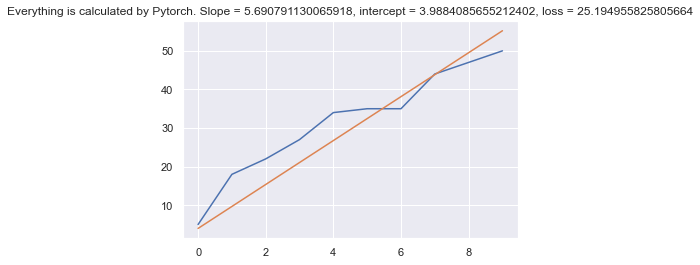

In [37]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred.detach().numpy())
plt.title(f'Everything is calculated by Pytorch. Slope = {w[0]}, intercept = {w[1]}, loss = {error}')

In [62]:
#it's time to replace prediction calculations too
x = np.arange(10)
y = x*5 + 10 + np.random.randint(-5, 5, 10)
x = torch.tensor([[item] for item in x], dtype = torch.float32)
y = torch.tensor([[item] for item in y], dtype = torch.float32)
model = nn.Linear(1, 1)
print(model.parameters())
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0006)
for step in range(number_of_steps):
    y_pred = model(x)
    error = loss(y, y_pred)
    error.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'step №{step}: loss = {error}, weights = {w}')

<generator object Module.parameters at 0x7f8148147740>
step №0: loss = 1367.7750244140625, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №1: loss = 1276.1319580078125, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №2: loss = 1190.8009033203125, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №3: loss = 1111.346923828125, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №4: loss = 1037.365234375, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №5: loss = 968.4788208007812, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №6: loss = 904.3366088867188, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №7: loss = 844.61181640625, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №8: loss = 789.0, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №9: loss = 737.2178955078125, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №10: loss = 689.0015869140625, weights = tensor([5.690

step №313: loss = 31.339351654052734, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №314: loss = 31.320566177368164, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №315: loss = 31.301794052124023, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №316: loss = 31.28304100036621, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №317: loss = 31.264293670654297, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №318: loss = 31.24556541442871, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №319: loss = 31.226852416992188, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №320: loss = 31.208154678344727, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №321: loss = 31.1894588470459, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №322: loss = 31.170772552490234, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №323: loss = 31.152109146118164, weights = tensor([5.6908, 3.9884], r

step №641: loss = 25.81399154663086, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №642: loss = 25.798961639404297, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №643: loss = 25.783939361572266, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №644: loss = 25.768917083740234, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №645: loss = 25.75390625, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №646: loss = 25.738910675048828, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №647: loss = 25.723918914794922, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №648: loss = 25.708948135375977, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №649: loss = 25.693981170654297, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №650: loss = 25.679027557373047, weights = tensor([5.6908, 3.9884], requires_grad=True)
step №651: loss = 25.664081573486328, weights = tensor([5.6908, 3.9884], requi

Text(0.5, 1.0, 'Now absolutely verything is calculated by Pytorch. Slope = 5.690791130065918, intercept = 3.9884085655212402, loss = 21.03236961364746')

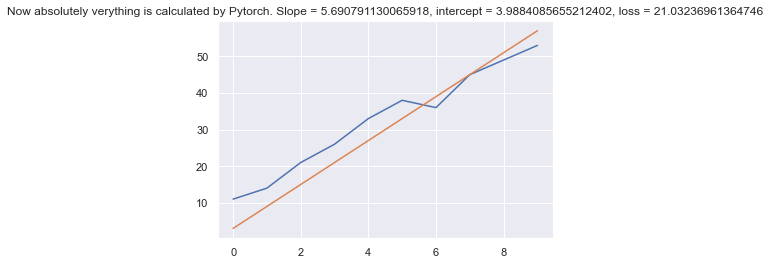

In [75]:
y_pred = model(x)
sns.lineplot(x = [int(item[0]) for item in x], y = [int(item[0]) for item in y])
sns.lineplot(x = [int(item[0]) for item in x], y = [int(item[0]) for item in y_pred])
plt.title(f'Now absolutely verything is calculated by Pytorch. Slope = {}, intercept = {w[1]}, loss = {error}')

In [78]:
model.

TypeError: 'method' object is not subscriptable

In [70]:
y_pred

tensor([[ 3.6271],
        [ 9.5790],
        [15.5308],
        [21.4826],
        [27.4345],
        [33.3863],
        [39.3381],
        [45.2899],
        [51.2418],
        [57.1936]], grad_fn=<AddmmBackward0>)